# **MIN709: Aula 01 - Redes Neurais Artificiais - 12/08/2023**
## **Classificação Multiclasse**
## Prof. Jones E. Egydio

* https://github.com/jegydio
* http://lattes.cnpq.br/7379006374125031

* jones.egydio@maua.br


##1. Objetivo
* Demonstrar como realizar uma tarefa de classificação multiclasse usando uma RNA.
* O banco de dados usado nesse exemplo é o Fashion-MNIST, que consiste de imagens de artigos de vestuário
da Zalando. Esse banco de dados pode ser obtido no link https://github.com/zalandoresearch/fashion-mnist.
* Nesse problema queremos determinar o tipo de vestuário que é mostrado em uma imagem.
* O problema consiste em dada uma imagem, a RNA avalia a probabilidade de existirem determinados tipos de
vestuário na imagem e determina qual o tipo mais provável entre dez possíveis.
* O objetivo desse problema é treinar uma RNA que recebe como entrada uma imagem e determina qual tipo de
vestuário é mostrado na imagem.

**Classificador de múltiplas classes**
* Um classificador de múltiplas classes muito mais eficiente do que um classificador um-contra-todos pode ser criado usando uma rede neural deep learning, onde cada neurônio da camada de saída representa uma classe diferente.
* Na figura abaixo é apresentado uma solução possível para esse classificador, que usa a função de ativação sigmóide nos neurônios da última camada.

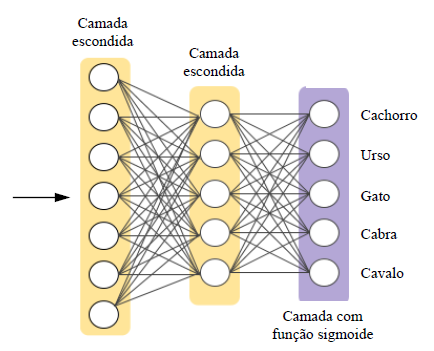

* Esse classificador multi-classe é muito mais eficiente do que o do tipo um-contra-todos, mas ainda apresenta um problema.
* 1. Uma função sigmóide produz na sua saída um número real entre 0 e 1, assim, a soma das probabilidades de todos os neurônios da camada de saída será maior do que 1.

* 2. **Existe probabilidade maior do que 1?**

* A solução para essa aparente incongruência é alterar a função de ativação dos neurônios da camada de saída de forma que a soma das probabilidades calculadas por todos eles sejam sempre igual a um -> **camada softmax**.

* A **camada softmax** calcula uma probabilidade para cada classe em um problema de classificação de múltiplas classes, cuja soma é sempre igual a um. Com essa restrição adicional o processo de treinamento da RNA é muito mais eficiente do que se for utilizada a função sigmoide na saída da RNA.

## 2. Setup - Importação de bibliotecas

In [ ]:
import tensorflow as tf  # Importa a biblioteca TensorFlow, usada para aprendizado de máquina e redes neurais
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib.pyplot para plotar gráficos
import numpy as np  # Importa a biblioteca NumPy para manipulação de matrizes e funções matemáticas eficientes

In [ ]:
# Define uma semente randômica
np.random.seed(25)  # Define a semente aleatória para reproduzibilidade dos resultados

## 3. Importar e carregar os dados

<br>
O Keras possui esse banco de dados e para usá-lo basta importá-lo com um comando, como mostrado no
código a seguir.
<br>

Observa-se que o Keras possui diversos bancos de dados, cujos exemplos já estão em tensores, facilitando o
seu uso. No manual do TensorFlow é informado quais bancos de dados estão disponíveis e como fazer para
utilizá-los:
* (https://www.tensorflow.org/api_docs/python/tf/keras/datasets).
<br>

O banco de dados Fashion MNIST possui 60.000 exemplos de treinamento e 10.000 exemplos de teste. Cada
exemplo consiste de uma imagem em tons de cinza, de dimensão 28x28 pixels, associada a um rótulo de 10 classes. Algumas dessas imagens estão mostradas na Figura 1.
<br>



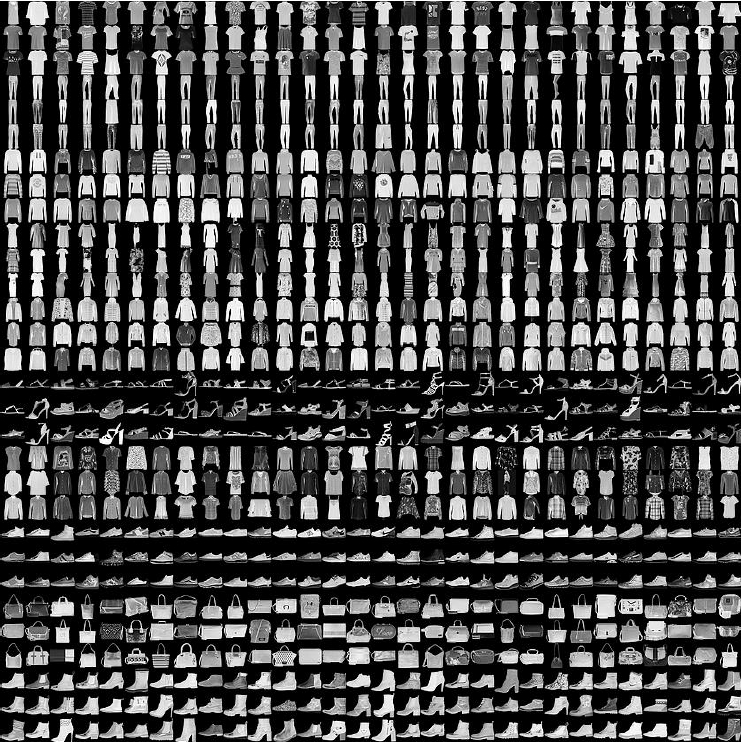


Figura 1 - Exemplos de imagens do conjunto de Fashion-MNIST (https://github.com/zalandoresearch/fashionmnist).
<br>

O banco de dados original da MNIST consiste de imagens de caracteres escritos a mão. As imagens de
vestuário da Zelando tentam aprimorar o banco de dados original do MNIST.
<br>

Os dados de imagens da MNIST são muito utilizados na área de IA/ML como referência para validar sistemas de
aprendizado de máquina. De fato os bancos de dados da MNIST são frequentemente os primeiros a serem
testados com um novo sistema. Se não funcionar com esses dados, então, não vai funcionar com nada. Se
funcionar com esses dados, pode ser que funcione ou não com outros dados.

In [ ]:
# Importa bancos de dados do Keras
from tensorflow.keras.datasets import fashion_mnist

# Carrega dados da Fashion-MNIST em tenores
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = fashion_mnist.load_data()

# Dimensões dos dados
# Definindo a largura máxima para alinhamento
width = 45

print('\n''Dimensão do tensor de imagens de treinamento:'.ljust(width), x_train_orig.shape)
print('Dimensão do tensor de imagens de teste:'.ljust(width), x_test_orig.shape)
print('Dimensão do tensor de saídas de treinamento:'.ljust(width), y_train_orig.shape)
print('Dimensão do tensor de saídas de teste:'.ljust(width), y_test_orig.shape)

Características das imagens de entrada:
* As imagens de entrada são em tons de cinza;
* Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total;
* O valor da intensidade luminosa de cada pixel da imagem é um número inteiro entre 0 e 255.
<br>

As saídas representam os tipos de vestuários (classes). As possíveis classes (rótulos) presentes nas imagens
são as seguintes:

1. camiseta;
2. calça;
3. pulôver;
4. vestido;
4. casaco;
6. sandália;
7. camisa;
8. tênis;
9. bolsa;
10. bota de cano curto.





In [ ]:
# Exemplo de uma imagem
index = 15
plt.imshow(x_train_orig[index], cmap='gray')
print ("y = " + str(y_train_orig[index]))

In [ ]:
# Imagens de vários exemplos
fig, axs = plt.subplots(2, 8, figsize=(16, 4))
index = 0
for i in range(2):
    for j in range(8):
      axs[i,j].imshow(x_train_orig[index], cmap='gray')
      index += 1
plt.show()

## 4. Pré-processamento dos dados
<br>
Primeiramente, vamos dividir os dados do conjunto de treinamento em dados de treinamento e de validação.
<br>
Após isso, os dados dos exemplos de treinamento e de teste devem ser processados de forma a serem colocados em tensores com as dimensões adequadas e normalizados corretamente.
<br>

**Divisão do conjunto de treinamento**
<br>

Para obter um conjunto de dados de validação vamos dividir o conjunto de treinamento de forma que 50.000 exemplos são usados como treinamento e 10.000 como validação.

In [ ]:
# Numeros de exemplos


# Divisão dos dados


width = 49
print('\n''Dimensão do tensor com as imagens de treinamento:'.ljust(width), x_train.shape)
print('Dimensão do tensor com as imagens de validação:'.ljust(width), x_val.shape)
print('Dimensão do tensor com as saídas de treinamento:'.ljust(width), y_train.shape)
print('Dimensão do tensor com as saídas de validação:'.ljust(width), y_val.shape)

**Redimensionamento e normalização das imagens**
<br>

Os dados de entrada de uma camada de neurônios densa é um vetor, assim, devemos redimensionar as imagens, que tem dimensão (28, 28), para transformá-las em um vetor linha de dimensão (1, 28*28).
<br>

Após esse redimensionamento o conjunto de dados é um tensor numpy onde cada linha representa uma imagem
"esticada".
<br>

Além disso devemos transformar os valores dos pixels das imagens em números reais entre 0 e 1.

In [ ]:
# Número de exemplos
m_test = x_test_orig.shape[0]

# Redimensionamento e normalização das imagens
x_train = np.reshape(x_train, (m_train, 28*28))/255.
x_val = np.reshape(x_val, (m_val, 28*28))/255.
x_test = np.reshape(x_test_orig, (m_test, 28*28))/255.

# Reshape: Redimensiona as imagens para terem a forma (m, 28*28), onde m é o número de exemplos de treinamento, validação ou teste.
# Nesse caso, as imagens são transformadas em vetores unidimensionais de tamanho 784 (28*28).

# Normalização: Divide os valores dos pixels de cada imagem por 255 para que fiquem no intervalo de 0 a 1.
# Isso é feito dividindo cada elemento do tensor pelo valor máximo possível de um pixel (255).
# A normalização ajuda a garantir que os valores dos pixels estejam na mesma escala, o que pode facilitar o treinamento do modelo.

# x_train: Tensor com as imagens de treinamento redimensionadas e normalizadas.
# x_val: Tensor com as imagens de validação redimensionadas e normalizadas.
# x_test: Tensor com as imagens de teste (originais) redimensionadas e normalizadas.

width = 49
print('Dimensão do tensor com as imagens de treinamento:'.ljust(width), x_train.shape)
print('Dimensão do tensor com as imagens de validação:'.ljust(width), x_val.shape)
print('Dimensão do tensor com as imagens de teste:'.ljust(width), x_test.shape)

# Imprime a dimensão (forma) de cada tensor para verificar o resultado do redimensionamento e normalização.

**Obs #1.:**

**Para que dividir os dados? Para que servem esses 3 conjuntos de dados?**
* Uma RNA é treinada usando o conjunto de treinamento.
* Durante o treinamento a RNA é avaliada usando o conjunto de validação.
* Uma vez que o modelo está treinado, ele é testado no conjunto de testes.
* O conjunto de validação é usado durante o treinamento para evitar avaliar o desempenho da RNA usando os mesmos dados utilizados para o treinamento.
* Para garantir a eficiência da RNA, a avaliação do seu desempenho é realizada com dados que ela nunca tenha utilizado  é muito importante comparar o desempenho da RNA nos dados utilizados no treinamento e nos dados de teste.
* O objetivo final é obter uma RNA capaz de generalizar o modelo, ou seja, uma RNA que apresenta um bom desempenho com dados nunca vistos.

**Para que ter conjuntos de validação e teste diferentes?**
* Tanto o conjunto de validação e teste não são usados diretamente para treinar a RNA.
* O conjunto de validação é usado para monitorar o treinamento da RNA e muitas decisões que tomamos para melhorar o desempenho da RNA são baseadas no desempenho da RNA no conjunto de validação  ou seja, o conjunto de validação é usado para ajustar os hiperparâmetros da RNA.
* O ajuste dos hiperparâmetros da RNA é de fato uma forma de treinamento da RNA, realizada pela pessoa que está desenvolvendo o modelo.
* Toda vez que alteramos os hiperparâmetros de uma RNA durante o seu treinamento, baseado no seu desempenho no conjunto de validação, alguma informação desse conjunto é incorporada na RNA.
* Durante o treinamento ajustamos e otimizamos os hiperparâmetros para obter uma RNA que apresenta um bom desempenho tanto no conjunto de treinamento como no de validação, assim:
o muita informação do conjunto de validação é incorporada aos parâmetros da RNA;
o se queremos realmente ter uma boa avaliação da RNA temos que usar um conjunto de dados nunca visto pela RNA durante o treinamento.

Concluindo: o conjunto de validação não pode ser considerado um conjunto nunca visto pela RNA, como é de fato o conjunto de teste.

**Em muitos casos é comum usar somente o conjunto de validação, ou somente o conjunto de teste para avaliar a RNA.**


**Obs #2.:**

**Pré-processamento dos dados**
<br>

* Os dados devem ser pré-processados -> é necessário definir como serão formatados e colocá-los em tensores.
* A forma como os dados são formatados depende muito do tipo de dado, por exemplo, imagens e textos têm suas características próprias.

**Vetorização dos dados**
<br>

* Todos os dados de entrada e de saída utilizados por uma RNA devem estar na forma de tensores -> a colocação dos dados em tensores consiste de um processo de vetorização dos dados.
* A colocação dos dados em tensores permite que a RNA processe-os de forma vetorizada, que é extremamente eficiente computacionalmente.
* A colocação dos dados em tensores permite dividir os dados de treinamento em grupos menores de exemplos de forma a não exigir muita memória do computador.
<br>

**Redimensionamento de tensores (“reshaping”)**
<br>

* Uma operação essencial de tensores muito usada nos cálculos envolvidos em uma RNA é o seu redimensionamento.
* Redimensionar um tensor significa rearranjar suas linhas e colunas para se obter um novo tensor com novos eixos de diferentes dimensões.
* Obviamente que o tensor redimensionado tem os mesmos elementos que o tensor original.
* Um caso especial de redimensionamento de tensores é a sua transposição  transpor uma matriz significa trocar suas linhas por suas colunas.

**Criar lista de classes**
<br>

Para poder analisar bem o desempenho da RNA é importante visualizar os seus resultados e para isso facilita
ter um lista com os nomes das classes.

Na célula abaixo é criada uma lista com os nomes das classes.

In [ ]:
class_names = ['camiseta', 'calça', 'pulôver', 'vestido', 'casaco', 'sandália',
'camisa', 'tênis', 'bolsa', 'bota de cano curto']

**Codificação das saídas em vetores "one-hot"**
<br>

As saídas de um problema de classificação multiclasse devem estar codificadas em vetores "ond-hot".
Na célula baixo é realizada essa codificação.

In [ ]:
#Importa função para codificação one-hot
from tensorflow.keras.utils import to_categorical

# Transforma saídas inteiras em vetores one-hot


# Mostra resultados
width = 49
print('Dimensão do tensor de saídas de treinamento:'.ljust(width), y_train_hot.shape)
print('Dimensão do tensor de saídas de validação:'.ljust(width), y_val_hot.shape)
print('Dimensão do tensor de saídas de teste:'.ljust(width), y_test_hot.shape)

print('\n''Aguns exemplos de saídas: \n', y_train_hot[:5])

In [ ]:
print(class_names)

In [ ]:
# Visualizando o one-hot
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5):
    axs[i].imshow(x_train_orig[i], cmap='gray')
plt.show()

##4. Configuração e compilação da RNA
<br>

**Configuração da RNA**
<br>

Para resolver esse problema de classificação multiclasse vamos utilizar uma RNA com a seguinte configuração:
* Número de camadas: 3;
* Número de elementos no vetor de entrada: 784;
* Número de neurônios da 1ª e 2ª camada: 64;
* Função de ativação da 1ª e 2ª camadas: Relu;
* Número de classes do problema: NC = 10;
* Função de ativação da camada de saída: softmax.

Na célula abaixo é configurada a RNA.

In [ ]:
# Importa bibliotecas do TensorFlow
from tensorflow.keras import models
from tensorflow.keras import layers

# Configuração da RNA


# Mostra resumo da rede


**Obs.:**
<br>

* A definição da melhor arquitetura de uma RNA para resolver um problema específico é um processo iterativo.
* O ideal é iniciar esse processo com uma RNA simples, de tamanho pequeno, cujo desempenho seja simplesmente melhor do que um resultado aleatório, que chamamos de resultado base.
* Um resultado melhor do que um resultado aleatório seria, por exemplo, para um problema de classificação binária obter uma taxa de acerto maior do que 50%, pois se aleatoriamente escolhermos uma das classes temos 50% de chance de acertar.
*  Observa-se que nem sempre é possível obter uma RNA que seja melhor do que o resultado base, isso pode significar que as saídas desejadas não estão contidas nas entradas dos exemplos. Observa-se que ao tentar resolver um problema usando uma RNA estamos fazendo duas hipóteses:
* 1. As saídas desejadas podem ser previstas pelos dados de entradas;
* 2. Os dados disponíveis contêm informação suficiente para a RNA aprender a relação entre as entradas e as saídas.
Pode acontecer de que essas hipóteses sejam falsas e se for esse o caso tem-se que pensar em novas soluções.
* Se esse primeiro modelo simples for capaz de ser melhor do que o resultado base então aprimoramos esse modelo segundo um procedimento que veremos posteriormente.

**Número de camadas e número de neurônios**

* Não existem muitas regras para escolher o número de camadas intermediárias e o número de neurônios em cada uma das camadas intermediárias no primeiro modelo -> a experiência e a intuição são os fatores principais que podem ajudar nessa definição.
* Em geral inicia-se o processo de desenvolvimento usando uma RNA simples com uma única camada intermediária.
* Uma indicação para definir o número de camadas e de neurônios em uma RNA está associada ao número de dados do conjunto de treinamento -> **o número de parâmetros de uma RNA deve ser inferior ao número de dados total presente nos dados de treinamento.**
* Outra regra importante para definir o número neurônios das camadas intermediárias é não criar gargalhos de informação, ou seja, uma camada intermediária nunca pode ter menos neurônios do que a camada de saída. Em um conjunto de camadas, cada camada tem acesso somente à informação na saída da camada anterior. Se uma camada tem poucos neurônios, ela vai perder alguma informação, que não será possível de ser recuperar nas camadas posteriores.
* Os números de neurônios das camadas intermediárias dependem muito do número de entradas e de saídas dos exemplos de treinamento e em geral podemos fazer alguns testes iniciais rápidos para determinar o número mínimo adequado.
* Obviamente que o número de neurônios da camada de saída é definido pelo número de saídas dos exemplos de treinamento.

**Compilação da RNA**
<br>

Em um problema de classificação multiclasse a função de custo que deve ser utilizada é entropia cruzada de múltiplas classes (“categorical_crossentropy”).
<br>

Como métrica para avaliar o desempenho do treinamento vamos utilizar a extaidão ("accuracy"). Essa métrica é a mais utilizada nos problemas de classificação de múltiplas classes e representa a fração do número de
classes classificadas de forma correta.
<br>

Para treinar essa RNA vamos utilizar o usando o método de otimização RMSprop com taxa de aprendizado de 0.001.
<br>

O código da célula abaixo realiza a compilação da RNA com essa configuração.

In [ ]:
# Importa classe dos otimizadores
from tensorflow.keras import optimizers

# Define otimizador RMSprop com taxa de aprendizado igual a 0.001


# Compilaçõ da RNA


**Obs.:**

O método `RMSprop` é uma alteração do método do Gradiente Descendente normal para incluir
uma taxa de aprendizagem variável ou adaptativa.

## 5. Treinamento e avaliação da RNA

Para treinar a RNA usaremos 20 épocas de treinamemto e lotes de 1024 elementos.

**Visualização do resultado do treinamento**
<br>

Para sabermos como o treinamento foi realizado precisamos visualizar a função de custo e a métrica ao longo
do processo de treinamento.

In [ ]:
# Salva custo e exatidão em vetores
history_dense_dict = history_dense.history
custo = history_dense_dict['loss']
exatidao = history_dense_dict['accuracy']
custo_val = history_dense_dict['val_loss']
exatidao_val = history_dense_dict['val_accuracy']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Usa o estilo 'ggplot'
plt.style.use('ggplot')

# Gráfico do custo em função das épocas
plt.figure(figsize=(8, 4))
plt.plot(epocas, custo, 'b', label='Treinamento', linewidth=2, marker='o', markersize=5)
plt.plot(epocas, custo_val, 'r', label='Validação', linewidth=2, marker='o', markersize=5)
plt.title('Valor da função de custo', fontsize=20)
plt.xlabel('Épocas', fontsize=15)
plt.ylabel('Custo', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(0, 1)  # Define o intervalo do eixo y de 0 a 9
plt.show()

# Gráfico da exatidão em função das épocas
plt.figure(figsize=(8, 4))
plt.plot(epocas, exatidao, 'b', label='Treinamento', linewidth=2, marker='o', markersize=5)
plt.plot(epocas, exatidao_val, 'r', label='Validação', linewidth=2, marker='o', markersize=5)
plt.title('Valor da exatidão', fontsize=20)
plt.xlabel('Épocas', fontsize=15)
plt.ylabel('Exatidão', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(0, 1)  # Define o intervalo do eixo y de 0 a 9
plt.show()

**Avaliação do desempenho da rede**

Após treinar a RNA é importante avaliar o seu desempenho com dados que não foram utilizados no
treinamento.

In [ ]:
# Calculo do custo e exatidão para os dados de treinamento, validação e teste
custo_e_metricas_train = rna_dense.evaluate(x_train, y_train_hot)
custo_e_metricas_val = rna_dense.evaluate(x_val, y_val_hot)
custo_e_metricas_test = rna_dense.evaluate(x_test, y_test_hot)

**Em um problema de classificação de múltiplas classes a métrica mais utilizada é a exatidão.**

Obs.:

* `loss`: esta é a função de custo ou perda. Ela mede quão bem o modelo está se saindo na tarefa de aprendizado durante o treinamento. Valores menores para loss indicam um melhor desempenho, já que o objetivo do treinamento é minimizar essa função.

* `accuracy`: essa é uma métrica de avaliação. Ela mede a porcentagem de previsões corretas do modelo. Neste caso, uma acurácia de 0.90 significa que o modelo está prevendo a classe correta aproximadamente 90% do tempo.

O modelo está tendo um desempenho razoavelmente bom, mas é importante observar que a acurácia e a perda no conjunto de treinamento são melhores do que nos conjuntos de validação ou teste. Isso pode indicar um leve overfitting, o que significa que o modelo pode estar aprendendo muito bem os dados de treinamento, mas não está generalizando tão bem para dados novos e desconhecidos. Você pode precisar considerar técnicas para mitigar o overfitting, como a regularização ou o aumento de dados (data augmentation).

## 6. Teste da RNA

Para avaliar melhor o desepenho da rede é importante calcular as saídas previstas dos exemplos do conjunto de
teste usando o método predict .

In [ ]:
# Calcula das classes previstas
y_prev = rna_dense.predict(x_test)

# Identifica classe prevista
classe_prev = np.argmax(y_prev, axis=1)

# Importe a biblioteca matplotlib.pyplot
import matplotlib.pyplot as plt

# Gráfico das classes reais e previstas para os primeiros 200 exemplos de teste
plt.figure(figsize=(14,4))
plt.plot(y_test_orig[:100], 'bo', label='Classes reais')
plt.plot(classe_prev[:100], 'ro', label="Classes previstas")
plt.title('Classes reais e previstas')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.legend()

# Defina o intervalo dos rótulos do eixo x
plt.xticks(range(0, 100, 5))

# Exiba o gráfico
plt.show()

Observe que cada círculo azul representa um exemplo classificado errado.

Vamos analisar alguns exemplos de teste que foram classificados errados.

In [ ]:
# Exemplo de classificação de uma imagem.
index = 23 #17, 23, 25, 40
plt.imshow(x_test_orig[index,:], cmap='gray')
print("Classe real:", y_test_orig[index], '-', class_names[np.squeeze(y_test_orig[index])], ';',"Classe prevista:", classe_prev[index],'-', class_names[np.squeeze(classe_prev[index])],)

## Outros testes

### Usando uma camada de Batch Normalization entre as camadas densas

In [ ]:
# Importa bibliotecas do TensorFlow
from tensorflow.keras import models
from tensorflow.keras import layers

# Configuração da RNA
rna = models.Sequential()
rna.add(layers.Dense(256, activation='relu', input_shape=(784,)))
rna.add(layers.BatchNormalization())  # Camada de Batch Normalization
rna.add(layers.Dense(64, activation='relu'))
rna.add(layers.BatchNormalization())  # Camada de Batch Normalization
rna.add(layers.Dense(10, activation='softmax'))

# Mostra resumo da rede
rna.summary()

In [ ]:
# Importa classe dos otimizadores
from tensorflow.keras import optimizers

# Define otimizador RMSprop com taxa de aprendizado igual a 0.01
rms = optimizers.RMSprop(learning_rate=0.001)
Model: "sequential_1"

# Compilaçõ da RNA
rna.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = rna.fit(x_train, y_train_hot, epochs=20, batch_size=1024, validation_data=(x_val, y_val_hot))

In [ ]:
# Salva custo e exatidão em vetores
history_dict = history.history
custo = history_dict['loss']
exatidao = history_dict['accuracy']
custo_val = history_dict['val_loss']
exatidao_val = history_dict['val_accuracy']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Usa o estilo 'ggplot'
plt.style.use('ggplot')

# Gráfico do custo em função das épocas
plt.figure(figsize=(8, 4))
plt.plot(epocas, custo, 'b', label='Treinamento', linewidth=2, marker='o', markersize=5)
plt.plot(epocas, custo_val, 'r', label='Validação', linewidth=2, marker='o', markersize=5)
plt.title('Valor da função de custo', fontsize=20)
plt.xlabel('Épocas', fontsize=15)
plt.ylabel('Custo', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(0, 1)  # Define o intervalo do eixo y de 0 a 9
plt.show()

# Gráfico da exatidão em função das épocas
plt.figure(figsize=(8, 4))
plt.plot(epocas, exatidao, 'b', label='Treinamento', linewidth=2, marker='o', markersize=5)
plt.plot(epocas, exatidao_val, 'r', label='Validação', linewidth=2, marker='o', markersize=5)
plt.title('Valor da exatidão', fontsize=20)
plt.xlabel('Épocas', fontsize=15)
plt.ylabel('Exatidão', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(0, 1)  # Define o intervalo do eixo y de 0 a 9
plt.show()

In [ ]:
# Calculo do custo e exatidão para os dados de treinamento, validação e teste
custo_e_metricas_train = rna.evaluate(x_train, y_train_hot)
custo_e_metricas_val = rna.evaluate(x_val, y_val_hot)
custo_e_metricas_test = rna.evaluate(x_test, y_test_hot)